# ガウシアンフィルタ
ガウシアンフィルタ(3x3、標準偏差1.3)を実装し、imori_noise.jpgのノイズを除去せよ。　　
ガウシアンフィルタとは画像の平滑化（滑らかにする）を行うフィルタの一種であり、ノイズ除去にも使われる。  
ガウシアンフィルタは注目画素の周辺画素を、ガウス分布による重み付けで平滑化し、次式で定義される。 このような重みはカーネルやフィルタと呼ばれる。

ただし、画像の端はこのままではフィルタリングできないため、画素が足りない部分は0で埋める。これを0パディングと呼ぶ。 かつ、重みは正規化する。(sum g = 1)

```
重み g(x,y,s) = 1/ (2 * pi * sigma * sigma) * exp( - (x^2 + y^2) / (2*s^2))
標準偏差s = 1.3による8近傍ガウシアンフィルタは
            1 2 1
K =  1/16 [ 2 4 2 ]
            1 2 1
```

In [49]:
# インポートはここで完結させる
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

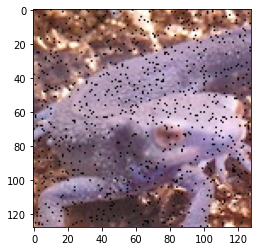

In [50]:
# 画像を読み込む(BGRで読み込む)
img = cv2.imread("data/imori_noise.jpg")
# BGRで表示する．
plt.imshow(img)

In [51]:
img

array([[[118,  79,  65],
        [ 42,   3,   0],
        [ 98,  52,  44],
        ...,
        [166, 113, 110],
        [135,  82,  72],
        [174, 122, 109]],

       [[135,  91,  78],
        [107,  63,  50],
        [100,  54,  46],
        ...,
        [187, 134, 131],
        [189, 139, 127],
        [154, 105,  89]],

       [[137,  85,  73],
        [126,  76,  64],
        [115,  69,  61],
        ...,
        [210, 158, 151],
        [ 46,   0,   0],
        [151, 105,  87]],

       ...,

       [[214, 174, 156],
        [ 40,   1,   0],
        [146, 107,  98],
        ...,
        [104,  59,  38],
        [106,  61,  40],
        [103,  56,  35]],

       [[246, 196, 178],
        [161, 115,  98],
        [163, 117, 109],
        ...,
        [134,  77,  56],
        [118,  61,  40],
        [115,  58,  37]],

       [[207, 154, 134],
        [183, 132, 116],
        [170, 121, 111],
        ...,
        [181, 115,  96],
        [159,  96,  75],
        [127,  64,  43]]

In [69]:
# ガウシアンフィルタ
def gaussian_filter(img, K_size=3, sigma=1.3):
    #　高さ(H)　幅(W)　チャンネル(C)
	if len(img.shape) == 3:
		H, W, C = img.shape
	else:
		img = np.expand_dims(img, axis=-1)
		H, W, C = img.shape

	## ゼロパディング
	pad = K_size // 2
	out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
	out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)

	## カーネルの準備
	K = np.zeros((K_size, K_size), dtype=np.float)
	for x in range(-pad, -pad + K_size):
		for y in range(-pad, -pad + K_size):
			K[y + pad, x + pad] = np.exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2))) # g(x, y)
	K /= (2 * np.pi * sigma * sigma)
	K /= K.sum()

	tmp = out.copy()

	# フィルタリング
	for y in range(H):
		for x in range(W):
			for c in range(C):
				out[pad + y, pad + x, c] = np.sum(K * tmp[y: y + K_size, x: x + K_size, c])

    # NumPy配列ndarrayの要素の値を任意の範囲(0~255)内に収めるクリッピング処理を行う
	out = np.clip(out, 0, 255)
	out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

	return out, K

[[0.08941182 0.12019445 0.08941182]
 [0.12019445 0.16157491 0.12019445]
 [0.08941182 0.12019445 0.08941182]]


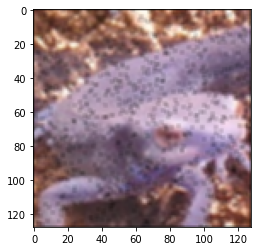

In [67]:
out, k = gaussian_filter(img, K_size=3, sigma=1.3) # 3*3のガウシアンフィルタ / 標準偏差１．３
print(k)
plt.imshow(out)

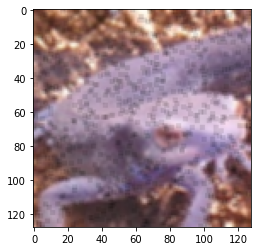

In [65]:
blur = cv2.blur(img,(3,3))
plt.imshow(blur)